<a href="https://colab.research.google.com/github/vivolscute/Dragon-Real-Sales-Price-predictor/blob/main/Dragon_Real_Sales_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dragon Real Sales Price predictor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
housing_data = pd.read_csv("/home/vivek/Desktop/data.csv")

In [ ]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:

housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing_data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

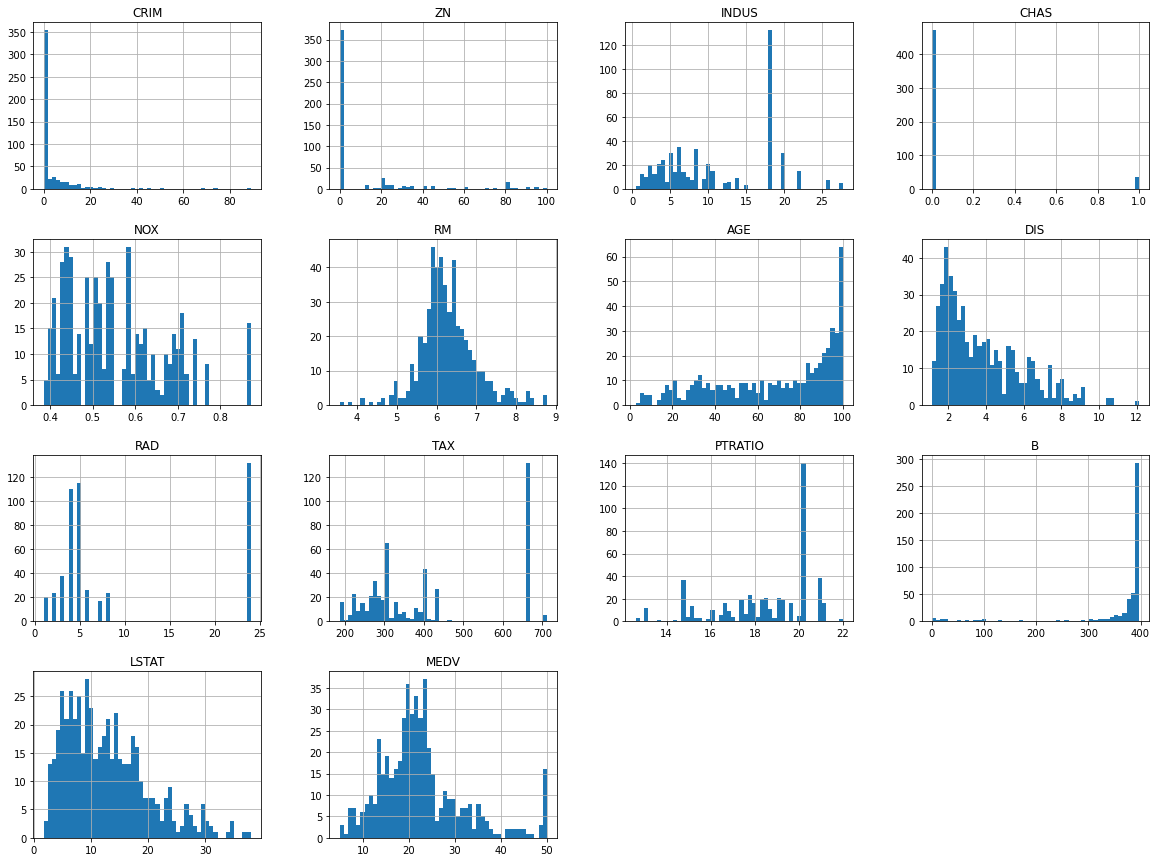

In [ ]:
housing_data.hist(bins=50,figsize=(20,15))

## Train,Test,Splitting

In [ ]:
np.random.seed(42)
def split_train_test(data,test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [ ]:
train_set , test_set = split_train_test(housing_data,0.2)

In [ ]:
len(train_set)

405

In [ ]:
len(test_set)

101

In [ ]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(housing_data,test_size=0.20,random_state=42)

In [ ]:
print("Rows in Test Set",len(test_set))
print("Rows in Train Set",len(train_set))

Rows in Test Set 102
Rows in Train Set 404


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing_data, housing_data['CHAS']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [ ]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
95/7

13.571428571428571

In [ ]:
376/28

13.428571428571429

In [ ]:
housing_data = strat_train_set.copy()

## Looking For Correlations

In [ ]:
corr_matrx = housing_data.corr()
corr_matrx['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

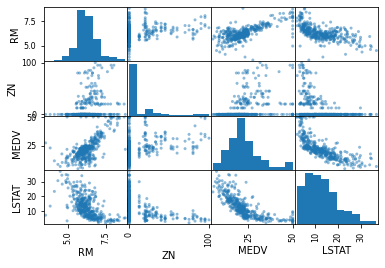

In [ ]:
from pandas.plotting import scatter_matrix
attr  =  ['RM','ZN','MEDV','LSTAT']
scatter_matrix(housing_data[attr])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

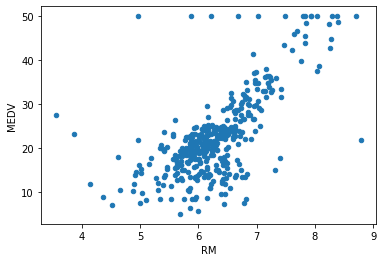

In [ ]:
housing_data.plot(kind='scatter',x='RM',y='MEDV')

# Attribute Combinations

In [ ]:
housing_data['TAXRM'] = housing_data['TAX']/housing_data['RM']

In [ ]:
housing_data['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [ ]:
corr_matrx = housing_data.corr()
corr_matrx['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

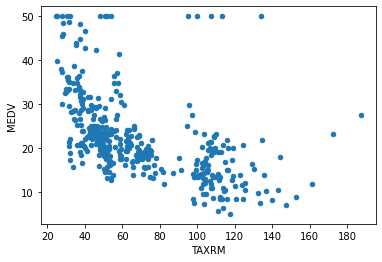

In [ ]:
housing_data.plot(kind='scatter',x='TAXRM',y='MEDV')

In [ ]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

# Missing Attributes
to take care of missing values:

    1. Get rid pf the missing data points
    2. Get rid of whole attribute
    3, set value to some value(0,mean,median)

In [ ]:
housing_data.dropna(subset=["RM"])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [ ]:
a = housing_data.dropna(subset=["RM"]).shape

In [ ]:
print(a)

(399, 15)


In [ ]:
housing_data.drop('RM',axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [ ]:
median = housing_data['RM'].median()

In [ ]:
housing_data['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [ ]:
housing_data.shape

(404, 15)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(housing_data)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.48312199e+01])

In [ ]:
X = imputer.transform(housing_data)

In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_data.columns)

In [ ]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.536786
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.412918
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# Scikit-Learn Design

Primarily, three types of objects:
    
    1. Estimators - It estimates some parameters based on a Data set eg. Imputer
    it has fit methods and transform method
    
    2. Transformars - transform method takes input and returns output based on the learnings from fit().it also has a convienience function called fit_transform() wich fits and then transform.
    
    3. Predictors - linearRegression model is an example of predictor. fit() and predict() are two common function. it also give score() function witch  will eveluate the pred

# Feature Scalling

# Primarily, two types of feature scaling methods:
    1. min max scaling(normalization) 
    (value-min)/(max-min)
    sklearn provides a class called MinMaxScaler for this
    
    2. Standardization
    (value - mean) / std
    sklearn provides a class called StandardScaler for this

#  Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_data_tr = my_pipeline.fit_transform(housing_tr)

In [ ]:
housing_data_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.86091034,
        -0.06501087, -0.50886303],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.94116739,
         0.21235476, -0.80755787],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81480158,
        -0.61974213,  1.12123315],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -1.27603303,
         2.27126115, -1.02768699],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.73869575,
        -0.89710776,  1.10066172],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.09940681,
         0.08433985, -0.65856363]])

# selecting a desired model for DRE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
#model = LinearRegression()
model.fit(housing_data_tr,housing_labels)

DecisionTreeRegressor()

In [ ]:
some_data = housing_data.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [ ]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_data_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
lin_mse

3.046096564714798e-31

# Using better evaluation tevhnique - Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_data_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
print_scores(rmse_scores)

Scores: [0.29590704 0.41818423 0.45317309 0.20952909 0.405586   0.15732133
 0.16278821 0.51137071 0.28240042 0.58051701]
Mean:  0.34767771222928945
Standard deviation:  0.14032441030100398
